In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from skimage import io
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils

Using TensorFlow backend.


In [2]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [3]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [4]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

In [5]:
def predict_image(pic):
    img = image.load_img(pic, grayscale=True, target_size=(48, 48))
    show_img=image.load_img(pic, grayscale=False, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = new_model.predict(x)
    
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(show_img)
    plt.show()

    m=0.000000000000000000001
    a=custom[0]
    for i in range(0,len(a)):
        if a[i]>m:
            m=a[i]
            ind=i
        
    print('Expression Prediction:',objects[ind])

/home/ec2-user/SageMaker/Facial_Expression_Saturdays/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


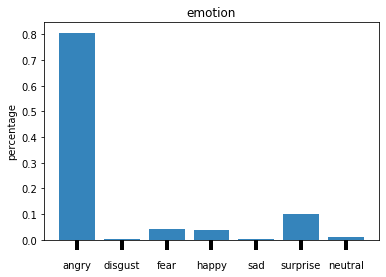

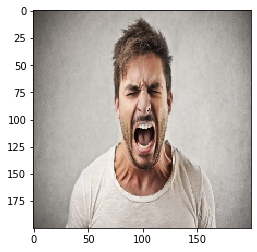

Expression Prediction: angry


In [6]:
predict_image('predict/enfado.jpg')

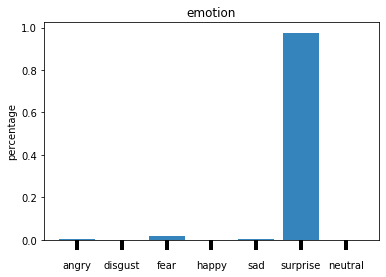

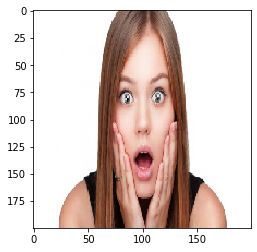

Expression Prediction: surprise


In [11]:
predict_image('predict/sorpresa.jpg')


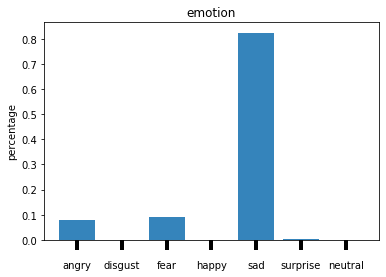

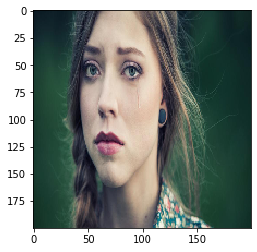

Expression Prediction: sad


In [14]:
predict_image('predict/triste.jpg')
